In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikitarom/planets-dataset")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████████████| 1.50G/1.50G [01:39<00:00, 16.2MB/s]

Extracting files...


Path to dataset files: C:\Users\omjid\.cache\kagglehub\datasets\nikitarom\planets-dataset\versions\3


In [2]:
import os

# This code checks for the kaggle.json file in the correct directory
api_token_path = os.path.expanduser("~/.kaggle/kaggle.json")

if os.path.exists(api_token_path):
    print(f"✅ Success! API token found at: {api_token_path}")
    print("Now, please try restarting the kernel (Kernel > Restart in the menu) and run the download code again.")
else:
    print(f"❌ API token NOT found at: {api_token_path}")
    print("Please double-check that you created the '.kaggle' folder and placed the 'kaggle.json' file inside it.")

✅ Success! API token found at: C:\Users\omjid/.kaggle/kaggle.json
Now, please try restarting the kernel (Kernel > Restart in the menu) and run the download code again.


In [3]:
import pandas as pd
import os

# The folder path from your successful download
folder_path = r"C:\Users\omjid\.cache\kagglehub\datasets\nikitarom\planets-dataset\versions\3\planet\planet"

# The name of the file we want to load from that folder
file_name = "train_classes.csv"

# Create the full path to the file
full_path = os.path.join(folder_path, file_name)

print(f"Attempting to load file from: {full_path}")

# Use pandas to read the local CSV file
df = pd.read_csv(full_path)

# Print the first 5 rows to confirm it loaded
print("✅ Success! The DataFrame was loaded correctly.")
print(df.head())

Attempting to load file from: C:\Users\omjid\.cache\kagglehub\datasets\nikitarom\planets-dataset\versions\3\planet\planet\train_classes.csv
✅ Success! The DataFrame was loaded correctly.
  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40479 entries, 0 to 40478
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  40479 non-null  object
 1   tags        40479 non-null  object
dtypes: object(2)
memory usage: 632.6+ KB


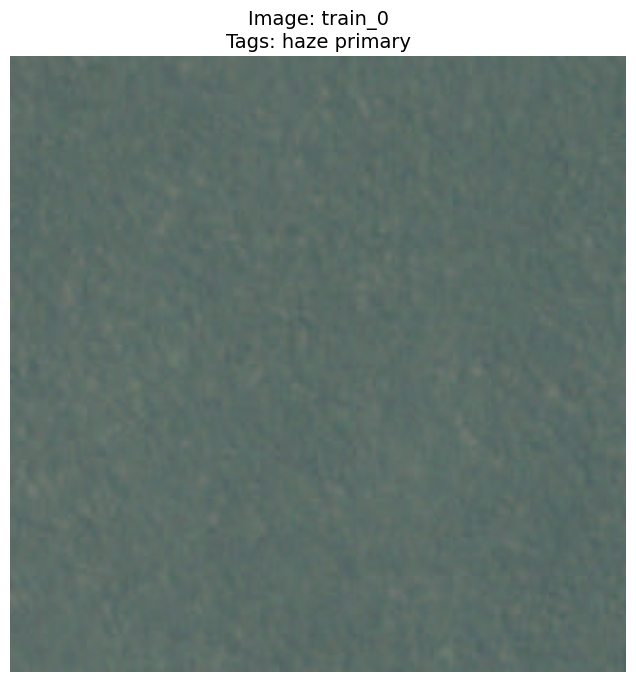

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# --- We assume 'df' and 'folder_path' are already loaded from the previous step ---

# 1. Define the path to the folder containing the images
image_folder_path = os.path.join(folder_path, 'train-jpg')

# 2. Get the name and tags of the first image from our DataFrame
image_name = df['image_name'].iloc[0]
image_tags = df['tags'].iloc[0]

# 3. Construct the full path to that specific image file
#    (We add the .jpg extension to the image name)
full_image_path = os.path.join(image_folder_path, f"{image_name}.jpg")

# 4. Open and display the image
if os.path.exists(full_image_path):
    # Load the image using the Pillow library
    img = Image.open(full_image_path)

    # Display the image using Matplotlib
    plt.figure(figsize=(8, 8)) # Set the figure size
    plt.imshow(img)
    plt.title(f"Image: {image_name}\nTags: {image_tags}", fontsize=14) # Set the title
    plt.axis('off') # Hide the x and y axes
    plt.show()
else:
    print(f"Error: Image not found at {full_image_path}")

--- STEP 1: PREPROCESSING DATA ---
Found 17 unique tags: ['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']

--- STEP 2: SPLITTING DATA ---
Training set size: 32383
Validation set size: 8096

--- STEP 3: CREATING DATA GENERATORS ---
Found 32383 validated image filenames.
Found 8096 validated image filenames.

--- STEP 4: DEFINING AND COMPILING THE CNN MODEL ---


C:\Users\omjid\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 17)                  │           8,721 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,950,481 (49.40 MB)

 Trainable params: 12,949,009 (49.40 MB)

 Non-trainable params: 1,472 (5.75 KB)


--- STEP 5: STARTING MODEL TRAINING ---


C:\Users\omjid\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1181s 1s/step - accuracy: 0.1179 - loss: 0.2698 - val_accuracy: 0.1675 - val_loss: 0.2088
Epoch 2/10
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 847s 836ms/step - accuracy: 0.0736 - loss: 0.1701 - val_accuracy: 0.0651 - val_loss: 0.1704
Epoch 3/10
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1491s 1s/step - accuracy: 0.0767 - loss: 0.1546 - val_accuracy: 0.0923 - val_loss: 0.1967
Epoch 4/10
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1896s 2s/step - accuracy: 0.0730 - loss: 0.1479 - val_accuracy: 0.0579 - val_loss: 0.1490
Epoch 5/10
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1880s 2s/step - accuracy: 0.0709 - loss: 0.1440 - val_accuracy: 0.0243 - val_loss: 0.1799
Epoch 6/10
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1850s 2s/step - accuracy: 0.0726 - loss: 0.1421 - val_accuracy: 0.0384 - val_loss: 0.1310
Epoch 7/10
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 53417s 53s/step - accuracy: 0.0703 - loss: 0.1419 - val_accuracy: 0.0346 - val_loss: 0.2672
Epoch 8/10
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 764s 755ms/step - accuracy: 0.

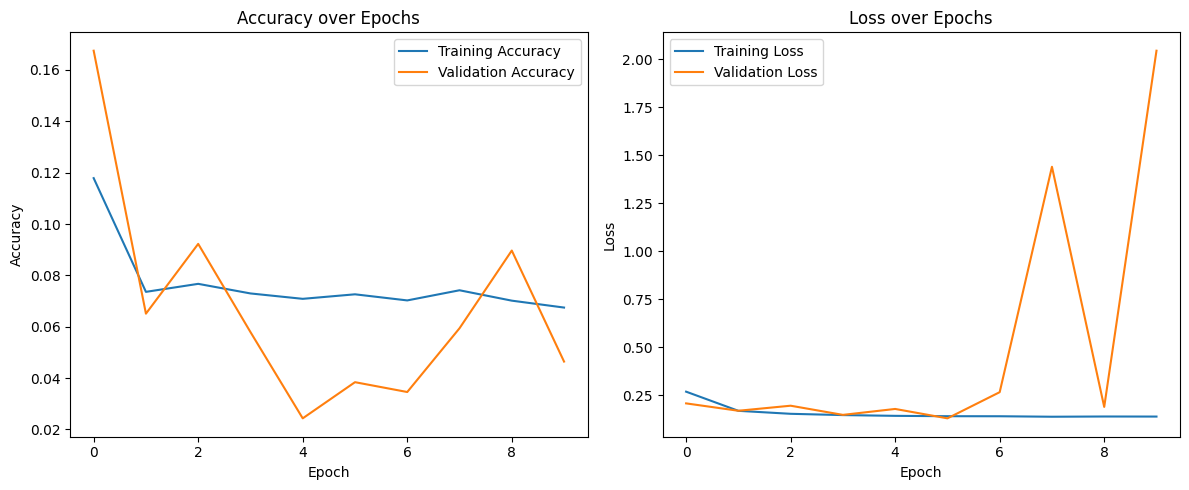

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# ==============================================================================
# STEP 1: DATA PREPROCESSING
# ==============================================================================
print("--- STEP 1: PREPROCESSING DATA ---")

# Create a list of tags
df['list_of_tags'] = df['tags'].apply(lambda x: x.split(' '))

# Get unique labels
all_tags = [tag for sublist in df['list_of_tags'] for tag in sublist]
unique_tags = sorted(list(set(all_tags)))
print(f"Found {len(unique_tags)} unique tags: {unique_tags}")

# One-hot encode the labels
for tag in unique_tags:
    df[tag] = df['tags'].apply(lambda x: 1 if tag in x.split(' ') else 0)

# Create file paths
image_folder_path = os.path.join(folder_path, 'train-jpg')
df['filepath'] = df['image_name'].apply(lambda x: os.path.join(image_folder_path, f"{x}.jpg"))

# ==============================================================================
# STEP 2: SPLIT DATA
# ==============================================================================
print("\n--- STEP 2: SPLITTING DATA ---")
train_df, validation_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(validation_df)}")

# ==============================================================================
# STEP 3: CREATE DATA PIPELINE
# ==============================================================================
print("\n--- STEP 3: CREATING DATA GENERATORS ---")
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)

# Training generator with augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col=unique_tags,
    target_size=IMAGE_SIZE,
    class_mode='raw',
    batch_size=BATCH_SIZE
)

# Validation generator (only rescaling)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    x_col='filepath',
    y_col=unique_tags,
    target_size=IMAGE_SIZE,
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# ==============================================================================
# STEP 4: DEFINE AND COMPILE THE MODEL
# ==============================================================================
print("\n--- STEP 4: DEFINING AND COMPILING THE CNN MODEL ---")
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5), # Dropout for regularization
    Dense(len(unique_tags), activation='sigmoid') # Sigmoid for multi-label output
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy', # Best loss function for multi-label classification
    metrics=['accuracy'] # Note: accuracy can be misleading for imbalanced datasets
)

model.summary()

# ==============================================================================
# STEP 5: TRAIN THE MODEL
# ==============================================================================
print("\n--- STEP 5: STARTING MODEL TRAINING ---")
# Define the number of epochs
EPOCHS = 10 # Start with a smaller number to see how it performs

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

print("\n--- TRAINING COMPLETE ---")

# ==============================================================================
# STEP 6: VISUALIZE TRAINING HISTORY
# ==============================================================================
print("\n--- STEP 6: VISUALIZING TRAINING HISTORY ---")

def plot_history(history):
    """Plots the training and validation accuracy and loss."""
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    print("Saved training history plot to 'training_history.png'")
    # plt.show()

plot_history(history)


In [8]:
from tensorflow.keras.callbacks import EarlyStopping


--- STEP 4: DEFINING THE IMPROVED CNN MODEL ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 17)                  │           8,721 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,950,481 (49.40 MB)

 Trainable params: 12,949,009 (49.40 MB)

 Non-trainable params: 1,472 (5.75 KB)


--- STEP 5: STARTING MODEL TRAINING WITH EARLY STOPPING ---
Epoch 1/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 869s 854ms/step - accuracy: 0.1146 - loss: 0.2741 - val_accuracy: 0.0999 - val_loss: 0.2101
Epoch 2/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 817s 807ms/step - accuracy: 0.0757 - loss: 0.1773 - val_accuracy: 0.1503 - val_loss: 0.1970
Epoch 3/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 844s 834ms/step - accuracy: 0.0746 - loss: 0.1625 - val_accuracy: 0.0813 - val_loss: 0.2414
Epoch 4/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 835s 825ms/step - accuracy: 0.0705 - loss: 0.1669 - val_accuracy: 0.0767 - val_loss: 0.3825
Epoch 5/50
1012/1012 ━━━━━━━━━━━━━━━━━━━━ 837s 827ms/step - accuracy: 0.0712 - loss: 0.1597 - val_accuracy: 0.1080 - val_loss: 0.2108
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.

--- TRAINING COMPLETE ---

--- STEP 6: VISUALIZING TRAINING HISTORY ---
Saved improved training history plot to 'improved_training_history.png'


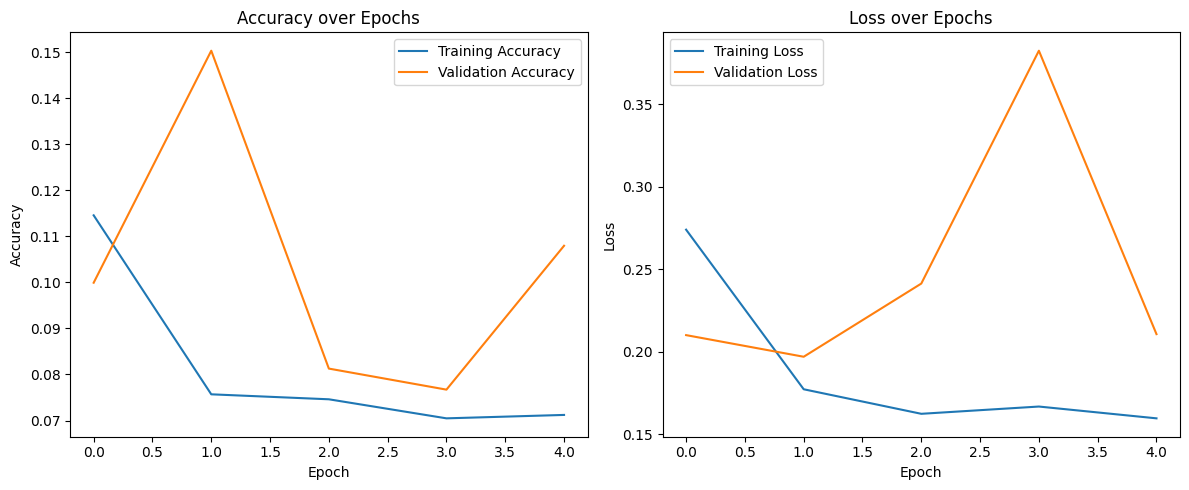

In [9]:
# ==============================================================================
# STEP 4: DEFINE AND COMPILE THE IMPROVED MODEL
# ==============================================================================
print("\n--- STEP 4: DEFINING THE IMPROVED CNN MODEL ---")
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), ## NEW ## Added dropout to regularize

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), ## NEW ## Added dropout to regularize

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), ## NEW ## Added dropout to regularize

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5), # This dropout was already here and is good practice
    Dense(len(unique_tags), activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==============================================================================
# STEP 5: TRAIN THE MODEL WITH EARLY STOPPING
# ==============================================================================
print("\n--- STEP 5: STARTING MODEL TRAINING WITH EARLY STOPPING ---")

## NEW ## Create an EarlyStopping callback
# This will monitor the validation loss.
# 'patience=3' means training will stop if val_loss doesn't improve for 3 consecutive epochs.
# 'restore_best_weights=True' ensures the model's weights are reset to the best epoch's weights.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# Set a higher number of epochs. Early stopping will find the best one.
EPOCHS = 50

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping] ## NEW ## Pass the callback to the fit method
)

print("\n--- TRAINING COMPLETE ---")

# ==============================================================================
# STEP 6: VISUALIZE TRAINING HISTORY
# ==============================================================================
print("\n--- STEP 6: VISUALIZING TRAINING HISTORY ---")

def plot_history(history):
    """Plots the training and validation accuracy and loss."""
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('improved_training_history.png')
    print("Saved improved training history plot to 'improved_training_history.png'")
    plt.show()

plot_history(history)
